<a href="https://colab.research.google.com/github/EmelyanovAndreyNSK/PythonTasks/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22StatLab_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1kArpJ9UKM9J5ti9wLgrwguBCMOpjhvDz"})
downloaded.GetContentFile('sample.xlsx')

1kArpJ9UKM9J5ti9wLgrwguBCMOpjhvDz

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_excel('sample.xlsx')
date = df['Date (MM/DD/YYYY)'].to_numpy()
flightNum = df['Flight_Number'].to_numpy()
tailNum = df['Tail Number'].to_numpy()
airborne = df['Airborne Time (Minutes)'].to_numpy()
carrierDel = df['Delay Carrier (Minutes)'].to_numpy()
weatherDel = df['Delay Weather (Minutes)'].to_numpy()
natDel = df['Delay National Aviation System (Minutes)'].to_numpy()
securityDel = df['Delay Security (Minutes)'].to_numpy()
lateDel = df['Delay Late Aircraft Arrival (Minutes)'].to_numpy()

In [ ]:
import numpy as np
import pandas as pd
import math
#from scipy.stats import expon
from scipy.special import gamma
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def MakeHist(array, n):
  fig = plt.figure(figsize=(10,7))
  ax = fig.add_subplot(1,1,1)
  count, bins, _ = ax.hist(array, bins = n, density= True, color = 'orange', label = "Selection values")

def OMPOfLambda(data):
    lamb = 1/(np.mean(data))
    print("lambda = {}".format(lamb))
    return lamb

def CheckLikelihood_Exp(data, n, lamb):
  arg = np.linspace(0, 600, 2000)
  exponData = [lamb*math.exp(-lamb*x) for x in arg]

  fig = plt.figure(figsize=(10,7))
  ax = fig.add_subplot(1,1,1)
  count, bins, _ = ax.hist(data, bins = n, density= True, color = 'orange', label = "Selection values")
  ax.plot(arg, exponData, color = 'blue', label = "Exponential distribution")
  ax.legend()

def OMMOfMeanAndVariance(data):
    firstMoment = np.mean(data)
    secondMoment = np.mean(np.square(data))
    variance = secondMoment - firstMoment**2
    return (firstMoment, variance)

def CheckLikelihood_Gamma(data, n, alpha, lamb, a=0, b=11):
  arg = np.linspace(a, b, 250)
  c = math.pow(alpha, lamb) * gamma(lamb)
  gammaData = [math.pow(x, lamb-1)*math.exp(-x/alpha)/c for x in arg]

  fig = plt.figure(figsize=(10,7))
  ax = fig.add_subplot(1,1,1)
  count, bins, _ = ax.hist(data, bins = n, density= True, color = 'orange', label = "Selection values")
  ax.plot(arg, gammaData, color = 'blue', label = "Exponential distribution")
  ax.legend()

def BernoulliPartMeasure(data):
  p = len(list(filter(lambda num: num == 0, data)))/len(data)
  print("probability that the event will not happen \np = {}".format(p))

Номера бортов

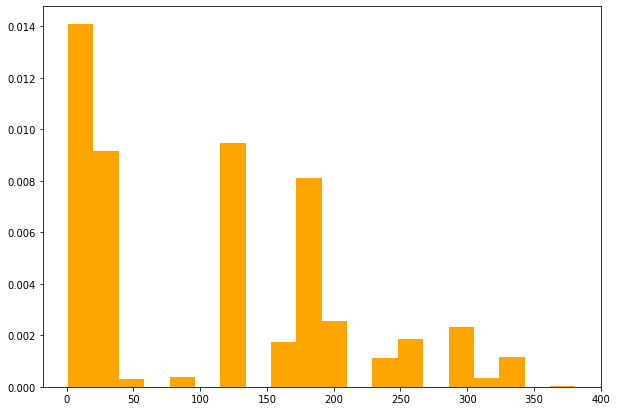

In [ ]:
MakeHist(list(filter(lambda num: num < 1000, flightNum)), 20)

Время в полёте

Можно учесть выбросы типа марта-апреля 2020 года

Можно сделать статистику отмен рейсов

In [ ]:
BernoulliPartMeasure(airborne)

probability that the event will not happen 
p = 0.016649090850989038


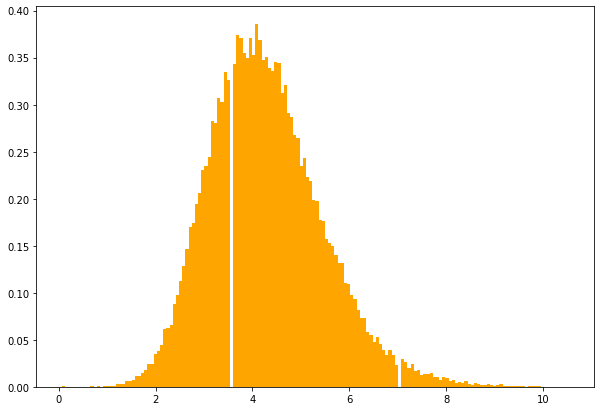

In [ ]:
buff = [(el-265)/15 for el in airborne]
data = list(filter(lambda num: num > 0, buff))
MakeHist(data, 160)

lambda = 13.53409441577152 
alpha = 0.31660402265536614


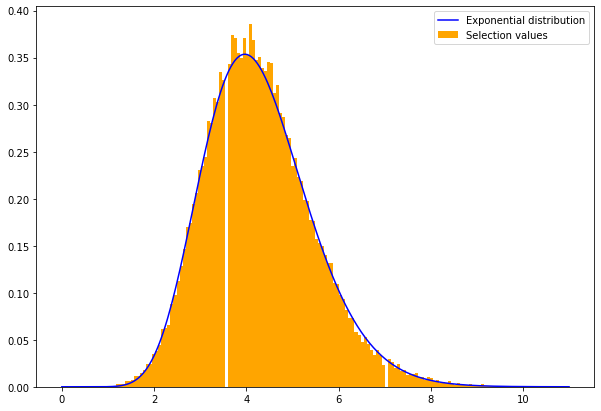

In [ ]:
E, D = OMMOfMeanAndVariance(data)
alpha = D/E
lamb = E/alpha
print("lambda = {} \nalpha = {}".format(lamb, alpha))

CheckLikelihood_Gamma(data, 160, alpha, lamb)

Задержка по вине перевозчика

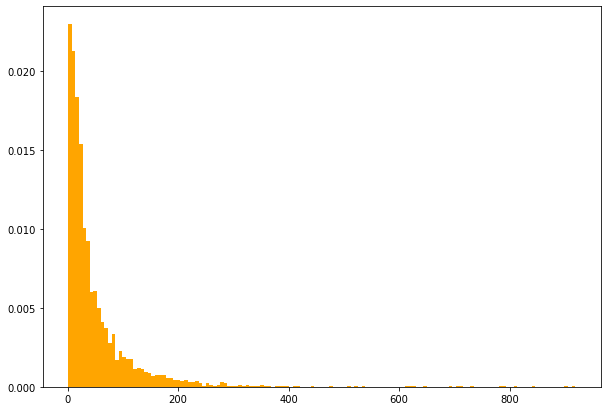

In [19]:
data = list(filter(lambda num: num != 0, carrierDel))
MakeHist(data, 140)

lambda = 0.020316405372544685


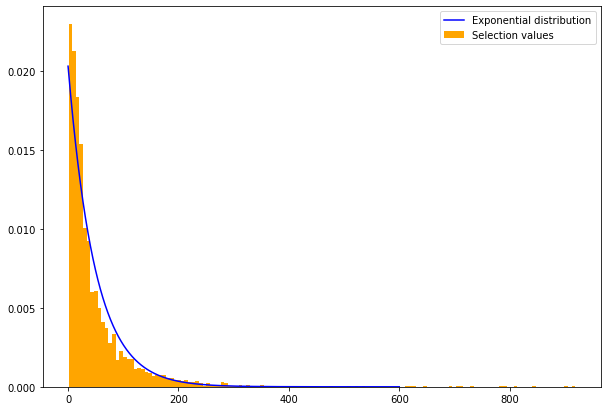

In [20]:
lamb = OMPOfLambda(data)
CheckLikelihood_Exp(data, 140, lamb)

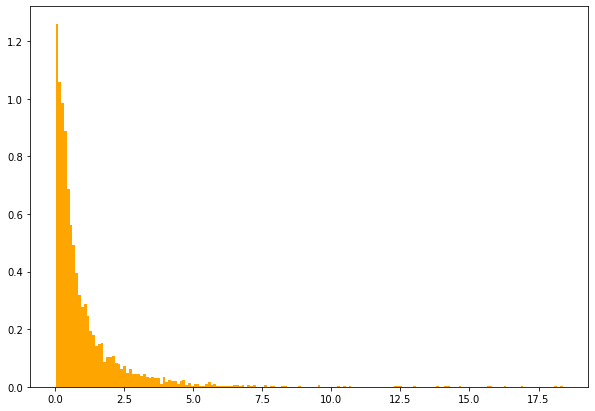

In [21]:
buff = [el/50 for el in carrierDel]
data = list(filter(lambda num: num > 0, buff))
MakeHist(data, 180)

lambda = 0.5337532151233714 
alpha = 1.844346950113593


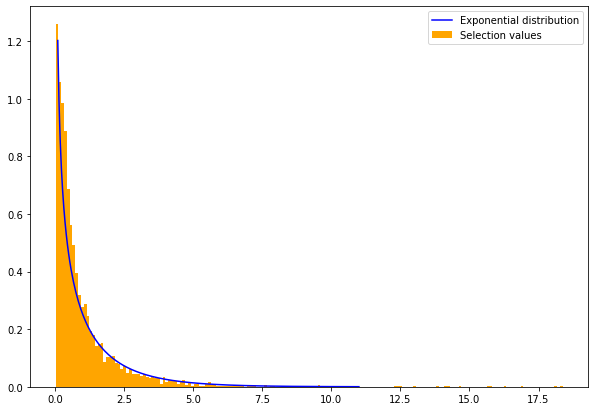

In [22]:
E, D = OMMOfMeanAndVariance(data)
alpha = D/E
lamb = E/alpha
print("lambda = {} \nalpha = {}".format(lamb, alpha))
CheckLikelihood_Gamma(data, 180, alpha, lamb, 0.1)

Задержка из-за погодных условий

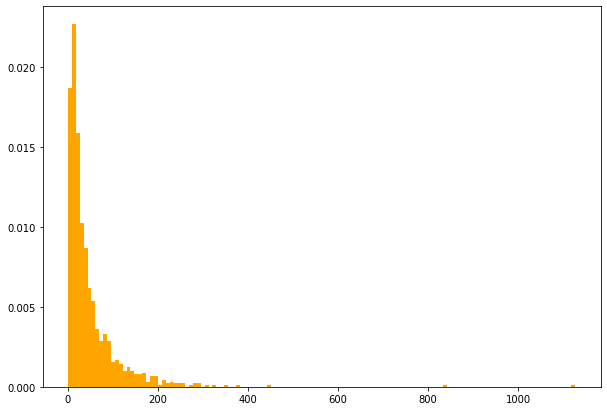

In [23]:
data = list(filter(lambda num: num != 0, weatherDel))
MakeHist(data, 130)

lambda = 0.020484353316002426


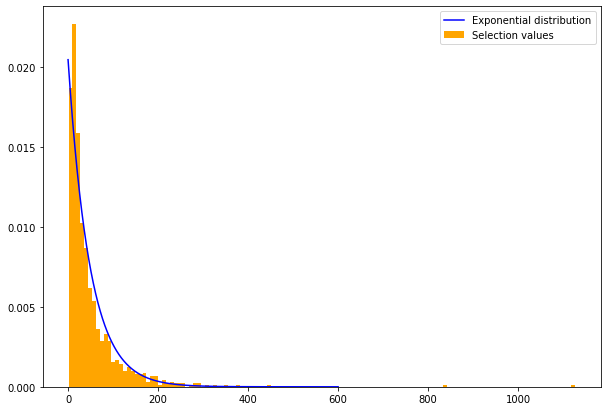

In [24]:
lamb = OMPOfLambda(data)
CheckLikelihood_Exp(data, 130, lamb)

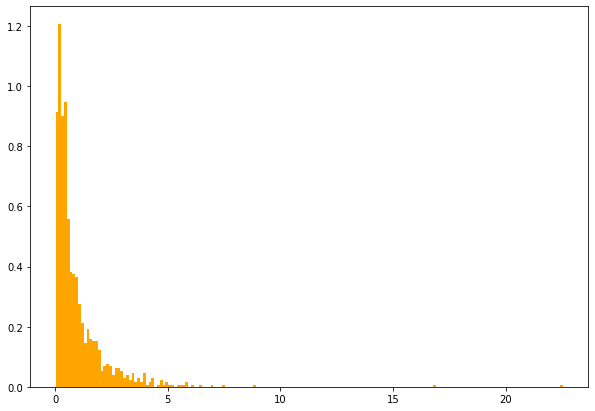

In [35]:
buff = [el/50 for el in weatherDel]
data = list(filter(lambda num: num > 0, buff))
MakeHist(data, 180)

lambda = 0.5141093289215282 
alpha = 1.8991193252225314


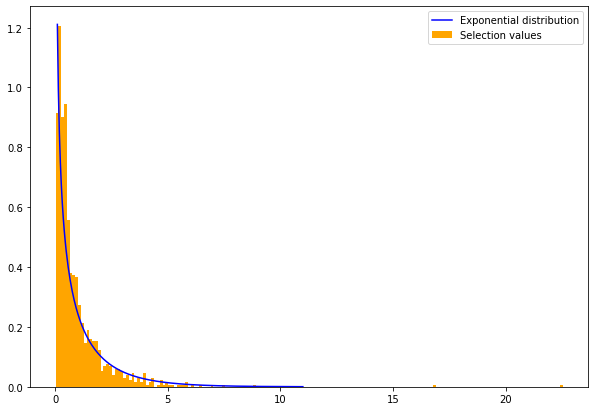

In [26]:
E, D = OMMOfMeanAndVariance(data)
alpha = D/E
lamb = E/alpha
print("lambda = {} \nalpha = {}".format(lamb, alpha))
CheckLikelihood_Gamma(data, 180, alpha, lamb, 0.1)

погода от месяцев

предварительный вывод: интенсивность почти не зависит от месяца, но зависит вероятность задержки(от времени года)

lambda = 0.024784482758620687


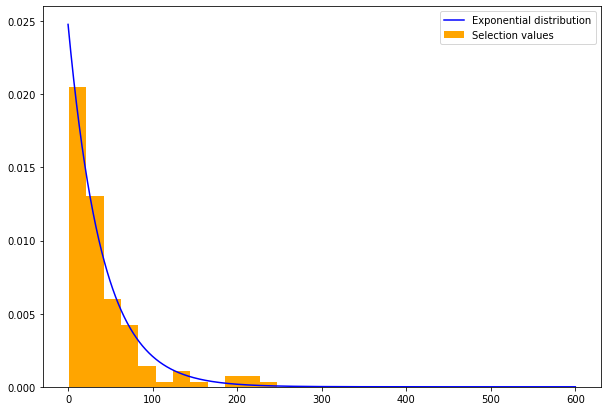

In [27]:
# например январь
months = pd.DatetimeIndex(date).month
janWeatherDelay = [weatherDel[i] for i in range(len(weatherDel)) if months[i] == 1]
janWeatherDelay = list(filter(lambda late: late != 0, janWeatherDelay))
lamb = OMPOfLambda(janWeatherDelay)
CheckLikelihood_Exp(janWeatherDelay, 12, lamb)

lambda = 0.024784482758620687
lambda = 0.017706821480406386
lambda = 0.024889602569249297
lambda = 0.021853500607041682
lambda = 0.020025839793281652
lambda = 0.025917372337695664
lambda = 0.019898819561551435
lambda = 0.018413275744487385
lambda = 0.01825068870523416
lambda = 0.02485256950294861
lambda = 0.013308428671491944
lambda = 0.02055993000874891


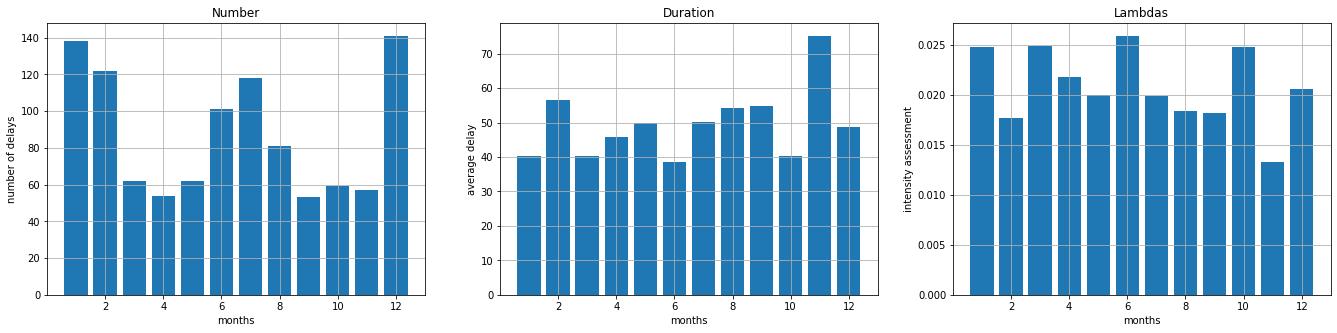

In [28]:
# выборочные характеристикки для разных месяцев
months = pd.DatetimeIndex(date).month
countList = []
durationList = []
lambList = []
for i in range(1, 13):
  monthWeatherDelay = [weatherDel[j] for j in range(len(weatherDel)) if months[j] == i]
  monthWeatherDelay = list(filter(lambda late: late != 0, monthWeatherDelay))
  countList.append(len(monthWeatherDelay))
  durationList.append(np.mean(monthWeatherDelay))
  lambList.append(OMPOfLambda(monthWeatherDelay))

fig = plt.figure(figsize=(23,5))

ax = fig.add_subplot(1, 3, 1)
ax.grid(linestyle = '-')
ax.set_title('Number')
ax.set_xlabel('months')
ax.set_ylabel('number of delays')
ax.bar(range(1, 13), countList)

ax = fig.add_subplot(1, 3, 2)
ax.grid(linestyle = '-')
ax.set_title('Duration')
ax.set_xlabel('months')
ax.set_ylabel('average delay')
ax.bar(range(1, 13), durationList)

ax = fig.add_subplot(1, 3, 3)
ax.grid(linestyle = '-')
ax.set_title('Lambdas')
ax.set_xlabel('months')
ax.set_ylabel('intensity assessment')
ax.bar(range(1, 13), lambList)

plt.show()

Задержка по вине национальной авиасистемы

Можно попытаться привязать к праздничным датам

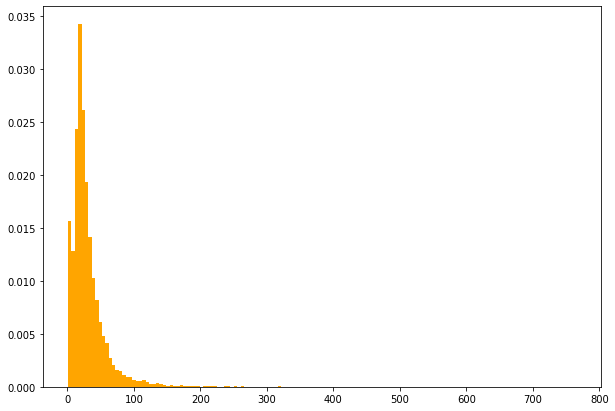

In [29]:
data = list(filter(lambda num: num != 0, natDel))
MakeHist(data, 150)

lambda = 0.03249468954518684


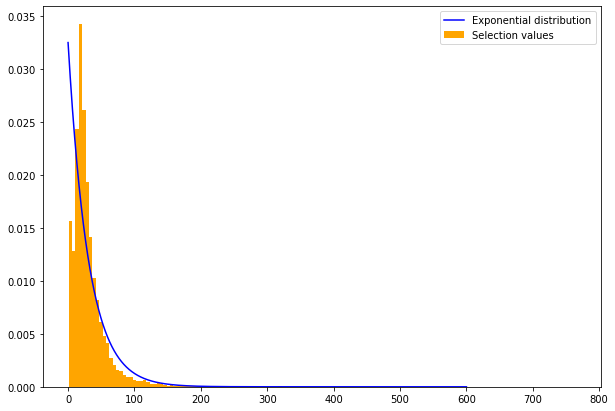

In [30]:
lamb = OMPOfLambda(data)
CheckLikelihood_Exp(data, 150, lamb)#0.025

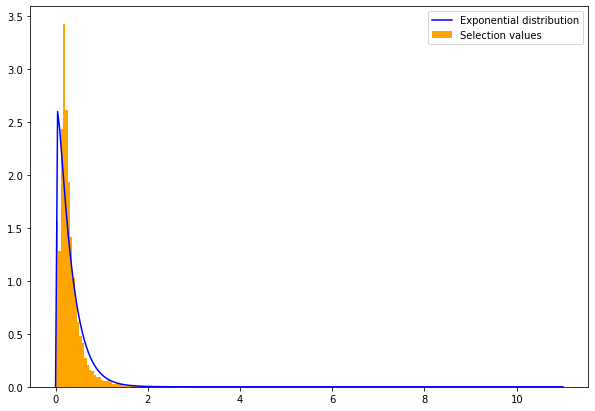

In [43]:
buff = [el/100 for el in natDel]
data = list(filter(lambda num: num > 0, buff))

E, D = OMMOfMeanAndVariance(data)
alpha = D/E
lamb = E/alpha 

CheckLikelihood_Gamma(data, 150, alpha, lamb)#0.025

Задержка из соображений безопасности

Предварительный вывод: как будто в 2004 и 2006 годах что-то произошло подозрительное, за 2012 и 2015 данных нет. На самом деле, задержек по причинам безопасности было очень мало, по этому судить об их распределении проблематично(да и на равномерное смахивает)

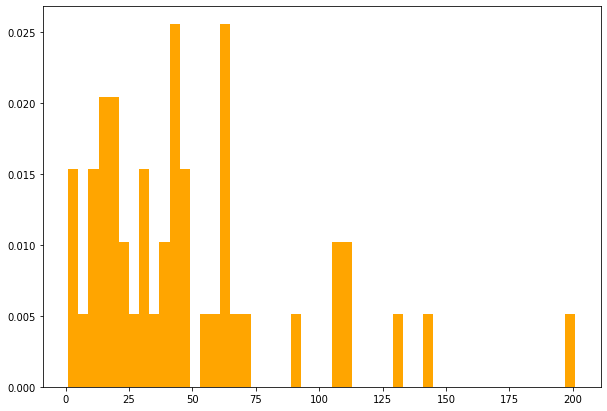

In [ ]:
data = list(filter(lambda num: num != 0, securityDel))
MakeHist(data, 50)

задержки из соображений безопасности в зависимости от года

lambda = 0.038461538461538464
lambda = 0.049180327868852465
lambda = 0.019830028328611898
lambda = 0.020833333333333332
lambda = 0.010899182561307902
lambda = 0.018518518518518517
lambda = 0.00980392156862745
lambda = 0.058823529411764705
lambda = nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


lambda = 0.013245033112582781
lambda = 0.021739130434782608
lambda = nan
lambda = 0.021505376344086023
lambda = 0.043478260869565216
lambda = 1.0
lambda = 0.041666666666666664
lambda = 0.028037383177570097
lambda = nan


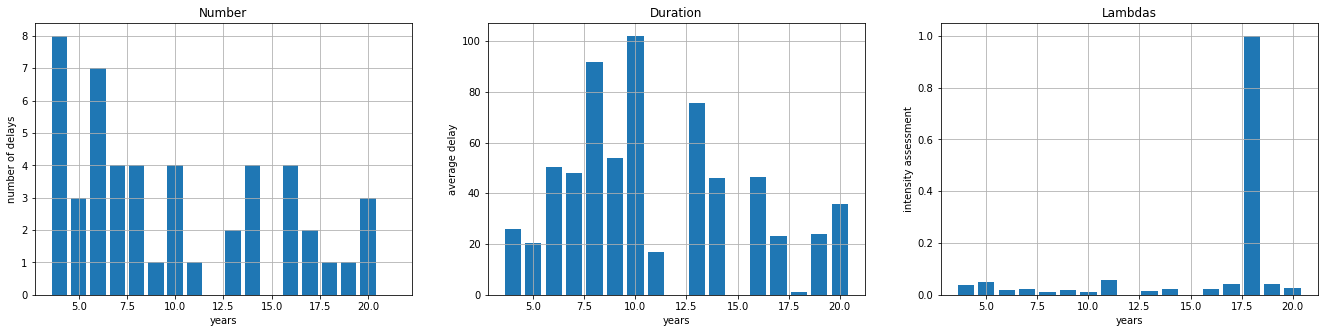

In [ ]:
# выборочные характеристикки для разных лет
years = pd.DatetimeIndex(date).year
countList = []
durationList = []
lambList = []
for i in range(2004, 2022):
  yearWeatherDelay = [securityDel[j] for j in range(len(securityDel)) if years[j] == i]
  yearWeatherDelay = list(filter(lambda late: late != 0, yearWeatherDelay))
  countList.append(len(yearWeatherDelay))
  durationList.append(np.mean(yearWeatherDelay))
  lambList.append(OMPOfLambda(yearWeatherDelay))

fig = plt.figure(figsize=(23,5))

ax = fig.add_subplot(1, 3, 1)
ax.grid(linestyle = '-')
ax.set_title('Number')
ax.set_xlabel('years')
ax.set_ylabel('number of delays')
ax.bar(range(4, 22), countList)

ax = fig.add_subplot(1, 3, 2)
ax.grid(linestyle = '-')
ax.set_title('Duration')
ax.set_xlabel('years')
ax.set_ylabel('average delay')
ax.bar(range(4, 22), durationList)

ax = fig.add_subplot(1, 3, 3)
ax.grid(linestyle = '-')
ax.set_title('Lambdas')
ax.set_xlabel('years')
ax.set_ylabel('intensity assessment')
ax.bar(range(4, 22), lambList)

plt.show()

Задержка из-за позднего прибытия самолёта

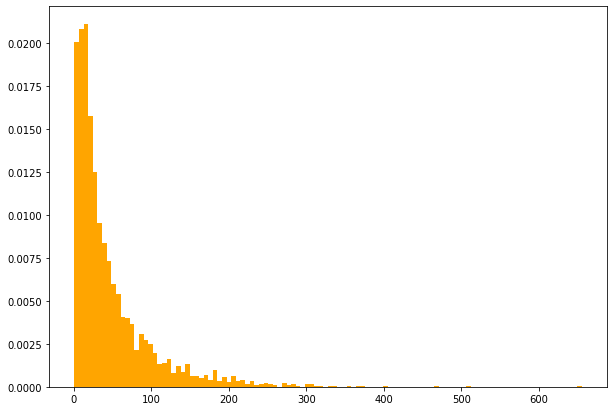

In [ ]:
data = list(filter(lambda num: num != 0, lateDel))
MakeHist(data, 110)

lambda = 0.02153989805642072


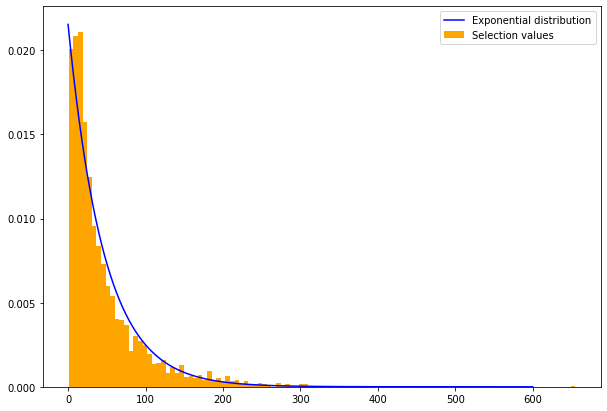

In [ ]:
lamb = OMPOfLambda(data)
CheckLikelihood_Exp(data, 110, lamb)#0.025

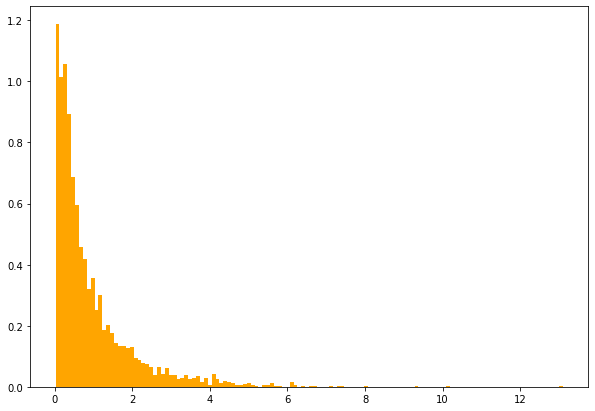

In [ ]:
buff = [el/50 for el in lateDel]
data = list(filter(lambda num: num > 0, buff))
MakeHist(data, 130)

lambda = 0.7535398525396233 
alpha = 1.232196940955853


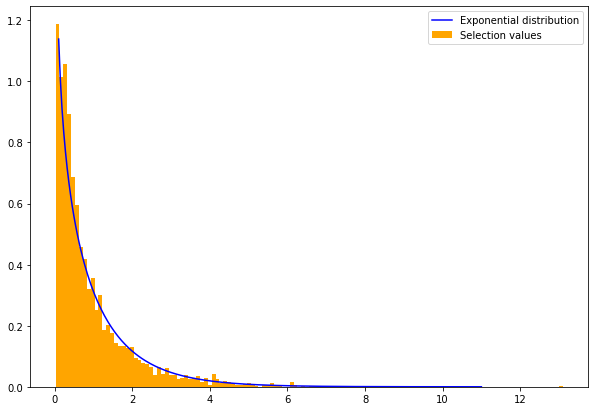

In [ ]:
E, D = OMMOfMeanAndVariance(data)
alpha = D/E
lamb = E/alpha
print("lambda = {} \nalpha = {}".format(lamb, alpha))
CheckLikelihood_Gamma(data, 130, alpha, lamb, 0.1)